In [3]:
import pandas as pd
import numpy as np

import anndata as ad
import scanpy as sc

import os

from SC2Spa import BM, PP

In [2]:
def Preprocess(prefix, RTheta, Y):
    
    SpaOTscs = []
    novosparcs = []
    SC2Spas = []
    LRs = []
    Tangrams = []

    #Preprocess (format transform and normalize)
    for i in range(5):

        Tangram = pd.read_csv(prefix + 'Tangram/pred_' + str(i) + '.csv').values
        SpaOTsc = pd.read_csv(prefix + 'SpaOTsc/pred_' + str(i) + '.csv').values
        novosparc = pd.read_csv(prefix + 'novosparc/pred_' + str(i) + '.csv').values
        SC2Spa = pd.read_csv(prefix + 'SC2Spa/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        LR = pd.read_csv(prefix + 'LR/pred_' + str(i) + '.csv', header = None, index_col = 0).values

        #Normalize
        SC2Spa = PP.MinMaxNorm( PP.RePolarTrans(PP.ReMMNorm(RTheta, SC2Spa)), Y_ref = Y)
        LR = PP.MinMaxNorm( PP.RePolarTrans(PP.ReMMNorm(RTheta, LR)), Y_ref = Y)
        novosparc = PP.MinMaxNorm(novosparc, Y_ref = Y)
        SpaOTsc = PP.MinMaxNorm(SpaOTsc, Y_ref = Y)
        Tangram = PP.MinMaxNorm(Tangram, Y_ref = Y)

        Tangrams.append(Tangram)
        SpaOTscs.append(SpaOTsc)
        novosparcs.append(novosparc)
        SC2Spas.append(SC2Spa)
        LRs.append(LR)
        
    return SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams

def Preprocess2(prefix, Y):
    
    SpaOTscs = []
    novosparcs = []
    SC2Spas = []
    LRs = []
    Tangrams = []

    #Preprocess (format transform and normalize)
    for i in range(5):
        
        Tangram = pd.read_csv(prefix + 'Tangram/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        SpaOTsc = pd.read_csv(prefix + 'SpaOTsc/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        novosparc = pd.read_csv(prefix + 'novosparc/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        SC2Spa = pd.read_csv(prefix + 'SC2Spa/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        LR = pd.read_csv(prefix + 'LR/pred_' + str(i) + '.csv', header = None, index_col = 0).values
        
        #Normalize
        SC2Spa = PP.MinMaxNorm(SC2Spa, Y_ref = Y)
        LR = PP.MinMaxNorm(LR, Y_ref = Y)
        novosparc = PP.MinMaxNorm(novosparc, Y_ref = Y)
        SpaOTsc = PP.MinMaxNorm(SpaOTsc, Y_ref = Y)
        Tangram = PP.MinMaxNorm(Tangram, Y_ref = Y)

        Tangrams.append(Tangram)
        SpaOTscs.append(SpaOTsc)
        novosparcs.append(novosparc)
        SC2Spas.append(SC2Spa)
        LRs.append(LR)
        
    return SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams

def Visualize(i, prefix, out_prefix, test_indices, adata, Y, s = 24, ctname = 'MCT', legend = False):
    
    index = test_indices[i]
    
    BM.Visualize_SSV2(adata = adata[index], coord = Y[index], ctname = ctname, s = s,
                                out_prefix = out_prefix, title = 'Raw', legend = legend)

    SC2Spa = pd.read_csv(prefix + 'SC2Spa/pred_' + str(i) + '.csv', header = None, index_col = 0).values
    SC2Spa = PP.RePolarTrans(PP.ReMMNorm(RTheta, SC2Spa))
    BM.Visualize_SSV2(adata = adata[index], coord = SC2Spa, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'SC2Spa', legend = legend)
    
    LR = pd.read_csv(prefix + 'LR/pred_' + str(i) + '.csv', header = None, index_col = 0).values
    LR = PP.RePolarTrans(PP.ReMMNorm(RTheta, LR))
    BM.Visualize_SSV2(adata = adata[index], coord = LR, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'LR', legend = legend)

    Tangram = pd.read_csv(prefix + 'Tangram/pred_' + str(i) + '.csv').values
    BM.Visualize_SSV2(adata = adata[index], coord = Tangram, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'Tangram', legend = legend)

    novosparc = pd.read_csv(prefix + 'novosparc/pred_' + str(i) + '.csv').values
    BM.Visualize_SSV2(adata = adata[index], coord = novosparc, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'Novosparc', legend = legend)

    SpaOTsc = pd.read_csv(prefix + 'SpaOTsc/pred_' + str(i) + '.csv').values
    BM.Visualize_SSV2(adata = adata[index], coord = SpaOTsc, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'SpaOTsc', legend = legend)
    
def Visualize2(prefix, out_prefix, adata, Y, index,
              SC2Spa, LR, Tangram, novosparc, SpaOTsc, s = 44, ctname = 'MCT', legend = False):
    
    BM.Visualize_SSV2(adata = adata[index], coord = Y[index], ctname = ctname, s = s,
                                out_prefix = out_prefix, title = 'Raw', legend = legend)

    BM.Visualize_SSV2(adata = adata[index], coord = SC2Spa, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'SC2Spa', legend = legend)
    
    BM.Visualize_SSV2(adata = adata[index], coord = LR, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'LR', legend = legend)

    BM.Visualize_SSV2(adata = adata[index], coord = Tangram, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'Tangram', legend = legend)

    BM.Visualize_SSV2(adata = adata[index], coord = novosparc, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'Novosparc', legend = legend)

    BM.Visualize_SSV2(adata = adata[index], coord = SpaOTsc, ctname = ctname, s = s,
                      out_prefix = out_prefix, title = 'SpaOTsc', legend = legend)

# MH1

## DataFrame

In [3]:
adata = ad.read_h5ad('Dataset/AdataMH1.h5ad')
adata.var_names_make_unique()

Y = adata.obs[['xcoord', 'ycoord']].values

RTheta = PP.PolarTrans(Y)
YNorm = PP.MinMaxNorm(Y, Y_ref = Y)

train_indices, test_indices = PP.LoadIndices(prefix = 'MouseHippocampus_SSV2/')
SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams = Preprocess(prefix = 'MouseHippocampus_SSV2/SI_Benchmarking/',
                                                      RTheta = RTheta, Y = Y)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
Tangram_performance = BM.eval_cv(Tangrams, YNorm, test_indices)
SpaOTsc_performance = BM.eval_cv(SpaOTscs, YNorm, test_indices)
novo_performance = BM.eval_cv(novosparcs, YNorm, test_indices)
SC2Spa_performance = BM.eval_cv(SC2Spas, YNorm, test_indices)
LR_performance = BM.eval_cv(LRs, YNorm, test_indices)

In [5]:
Benchmark = pd.DataFrame([SC2Spa_performance.mean().tolist(),
                          Tangram_performance.mean().tolist(),
                          novo_performance.mean().tolist(),
                          SpaOTsc_performance.mean().tolist(),
                          LR_performance.mean().tolist()],
                          columns=['pearsonr', 'RMSE', 'R2'],
                          index = ['SC2Spa', 'Tangram', 'Novosparc', 'SpaOTsc', 'LR'])
for column in Benchmark.columns:
    Benchmark[column] = Benchmark[column].apply('{:,.3f}'.format)

root = 'Benchmarking/MH1/'
if not os.path.exists(root):
    os.makedirs(root)
    
Benchmark.to_csv(root + 'Benchmark_MH1.csv', header = True, index = True)
BM1 = Benchmark
Benchmark

,pearsonr,RMSE,R2
SC2Spa,0.810,0.213,0.659
Tangram,0.503,0.341,0.123
Novosparc,0.591,0.325,0.206
SpaOTsc,0.309,0.354,0.056
LR,0.457,0.438,-0.443


## Visualization

In [6]:
adata = ad.read_h5ad('Dataset/AdataMH1.h5ad')
adata.var_names_make_unique()

Anno = pd.read_csv('MouseHippocampus_SSV2/ssHippo_RCTD.csv', index_col = 0)

Anno['MCT'] = 't'

index1 = Anno.index[(Anno['celltype_1'] == Anno['celltype_2'])]
Anno['MCT'][index1] = Anno['celltype_1'][index1]
index2 = Anno.index[(Anno['celltype_1'] != Anno['celltype_2'])]
Anno['MCT'][index2] = (Anno['celltype_1'][index2] + '_' + Anno['celltype_2'][index2]).apply(lambda x: '_'.join(sorted(set(x.split('_')))))

adata.obs = adata.obs.merge(Anno, left_index = True, right_index = True, how = 'left')
print(adata.obs.shape)
adata.obs.head()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(35349, 14)


,xcoord,ycoord,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ERCC,pct_counts_ERCC,leiden,spot_class,celltype_1,celltype_2,MCT
barcodes,,,,,,,,,,,,,,
GTAAGTTGGCATGA,5524.7,2764.0,3429,3429,8230.0,169.0,2.053463,1.0,0.012151,4,singlet,CA3Pc,CA3Pc,CA3Pc
ATGGCAGTCCCGCC,5511.6,2814.2,3306,3304,7656.0,212.0,2.769070,2.0,0.026123,4,singlet,CA3Pc,CA3Pc,CA3Pc
TAAGCAACATTGAC,5473.3,2813.5,3139,3138,7523.0,173.0,2.299614,0.0,0.000000,4,doublet_certain,CA3Pc,O,CA3Pc_O
CTCCAGCCTTGCAT,3536.2,3484.7,2982,2980,8067.0,569.0,7.053427,1.0,0.012396,12,doublet_certain,C,O,C_O
GACCCGCGATGCCC,5428.8,4168.4,2869,2866,7824.0,219.0,2.799080,2.0,0.025562,6,doublet_certain,O,MM,MM_O


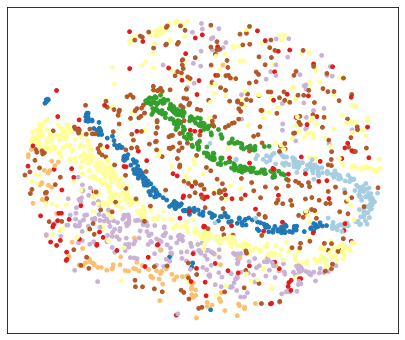

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


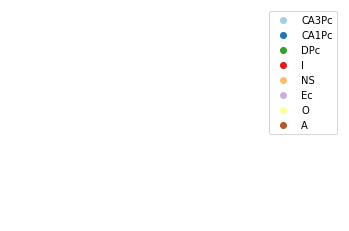

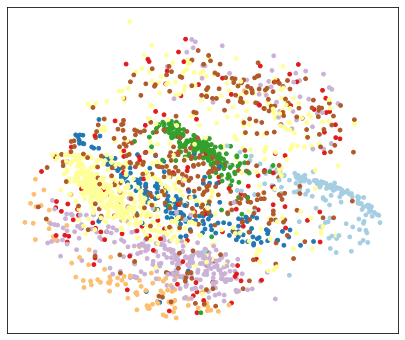

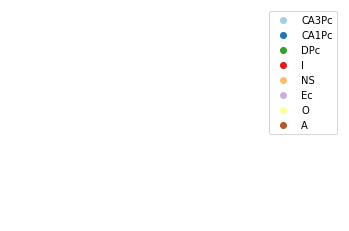

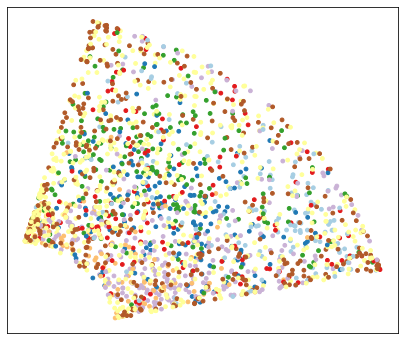

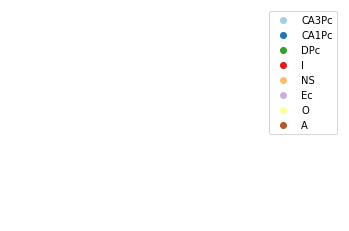

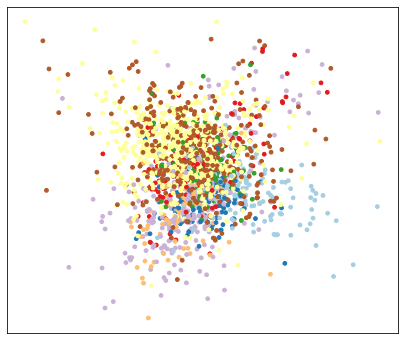

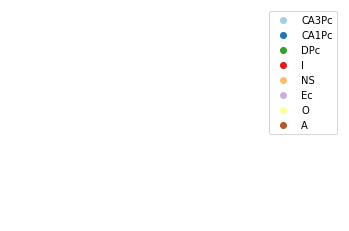

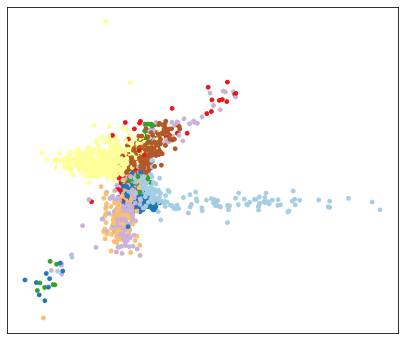

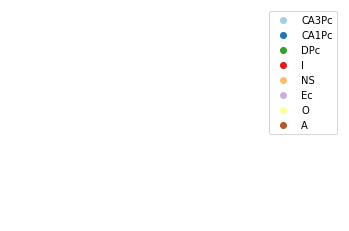

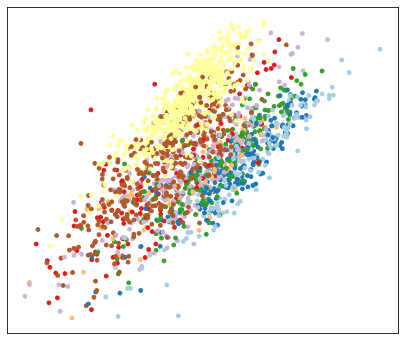

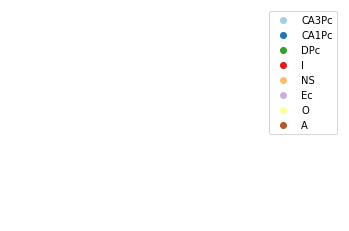

In [7]:
Visualize(i = 0,
          prefix = 'MouseHippocampus_SSV2/SI_Benchmarking/',
          out_prefix = 'Benchmarking/MH1/',
          test_indices = test_indices, s =14,
          adata = adata, Y = Y)

# Mouse Embryo1

## DataFrame

In [8]:
adata = ad.read_h5ad('Dataset/AdataEmbryo1.h5ad')
adata.var_names_make_unique()

Y = adata.obs[['xcoord', 'ycoord']].values

RTheta = PP.PolarTrans(Y)
YNorm = PP.MinMaxNorm(Y, Y_ref = Y)

train_indices, test_indices = PP.LoadIndices(prefix = 'MouseEmbryo_SSV2/')
SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams = Preprocess(prefix = 'MouseEmbryo_SSV2/SI_Benchmarking/',
                                                      RTheta = RTheta, Y = Y)

In [9]:
adata.obs

,xcoord,ycoord,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ERCC,pct_counts_ERCC,leiden
barcodes,,,,,,,,,,
TTCAATTCTCGCTT,2113.1,5092.7,2180,2180,3405.0,108.0,3.171806,2.0,0.058737,7
TTTCTGTGCAGACC,2112.9,4926.6,2240,2240,3483.0,82.0,2.354292,1.0,0.028711,4
TTTCACAGCGACGT,1789.3,4874.1,2047,2047,3149.0,37.0,1.174976,0.0,0.000000,7
CTCTGGCCTCGCTT,3120.3,5450.9,2171,2169,3245.0,47.0,1.448382,0.0,0.000000,4
AACGGCGTCAGGCA,2020.0,3519.0,1901,1901,3159.0,73.0,2.310858,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
GCACCGTGTCCGAT,3266.0,4534.7,271,271,293.0,4.0,1.365188,0.0,0.000000,0
GTAAAAGTAGCTCT,3769.0,3363.3,211,211,226.0,0.0,0.000000,0.0,0.000000,6
ACCGGTGCGCCTCC,3255.7,3152.7,242,242,254.0,3.0,1.181102,0.0,0.000000,0


In [10]:
Tangram_performance = BM.eval_cv(Tangrams, YNorm, test_indices)
SpaOTsc_performance = BM.eval_cv(SpaOTscs, YNorm, test_indices)
novo_performance = BM.eval_cv(novosparcs, YNorm, test_indices)
SC2Spa_performance = BM.eval_cv(SC2Spas, YNorm, test_indices)
LR_performance = BM.eval_cv(LRs, YNorm, test_indices)

In [11]:
Benchmark = pd.DataFrame([SC2Spa_performance.mean().tolist(),
                          Tangram_performance.mean().tolist(),
                          novo_performance.mean().tolist(),
                          SpaOTsc_performance.mean().tolist(),
                          LR_performance.mean().tolist()],
                          columns=['pearsonr', 'RMSE', 'R2'],
                          index = ['SC2Spa', 'Tangram', 'Novosparc', 'SpaOTsc', 'LR'])
for column in Benchmark.columns:
    Benchmark[column] = Benchmark[column].apply('{:,.3f}'.format)

root = 'Benchmarking/Embryo1/'
if not os.path.exists(root):
    os.makedirs(root)
    
Benchmark.to_csv(root + 'Benchmark_MouseEmbryo1.csv', header = True, index = True)
BM2 = Benchmark
Benchmark

,pearsonr,RMSE,R2
SC2Spa,0.892,0.154,0.795
Tangram,0.570,0.312,0.159
Novosparc,0.616,0.304,0.201
SpaOTsc,0.496,0.313,0.157
LR,0.605,0.328,0.073


## Visualization

In [12]:
adata = ad.read_h5ad('Dataset/AdataEmbryo1.h5ad')
adata.var_names_make_unique()

Anno = pd.read_csv('MouseEmbryo_SSV2/slideSeq_Puck190926_03_RCTD.csv', index_col = 0)

Anno['MCT'] = 't'

index1 = Anno.index[(Anno['celltype_1'] == Anno['celltype_2'])]
Anno['MCT'][index1] = Anno['celltype_1'][index1]
index2 = Anno.index[(Anno['celltype_1'] != Anno['celltype_2'])]
Anno['MCT'][index2] = (Anno['celltype_1'][index2] + '_' + Anno['celltype_2'][index2]).apply(lambda x: '_'.join(sorted(set(x.split('_')))))

adata.obs = adata.obs.merge(Anno, left_index = True, right_index = True, how = 'left')
print(adata.obs.shape)
adata.obs.head()

(41406, 14)


,xcoord,ycoord,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ERCC,pct_counts_ERCC,leiden,spot_class,celltype_1,celltype_2,MCT
barcodes,,,,,,,,,,,,,,
TTCAATTCTCGCTT,2113.1,5092.7,2180,2180,3405.0,108.0,3.171806,2.0,0.058737,7,doublet_uncertain,My,Sc,My_Sc
TTTCTGTGCAGACC,2112.9,4926.6,2240,2240,3483.0,82.0,2.354292,1.0,0.028711,4,singlet,Sc,Sc,Sc
TTTCACAGCGACGT,1789.3,4874.1,2047,2047,3149.0,37.0,1.174976,0.0,0.000000,7,doublet_uncertain,My,Sc,My_Sc
CTCTGGCCTCGCTT,3120.3,5450.9,2171,2169,3245.0,47.0,1.448382,0.0,0.000000,4,doublet_certain,Sc,PEL,PEL_Sc
AACGGCGTCAGGCA,2020.0,3519.0,1901,1901,3159.0,73.0,2.310858,0.0,0.000000,2,doublet_certain,H,PEL,H_PEL


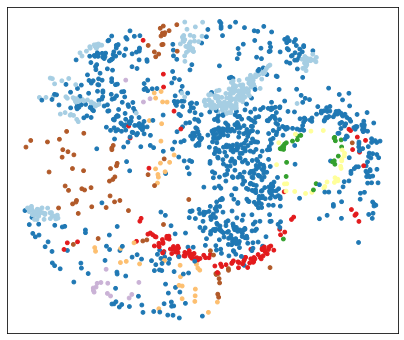

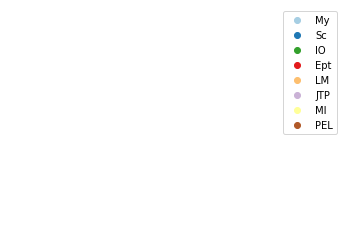

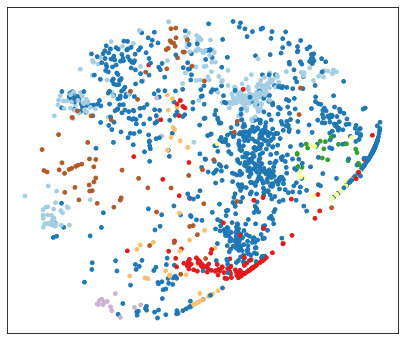

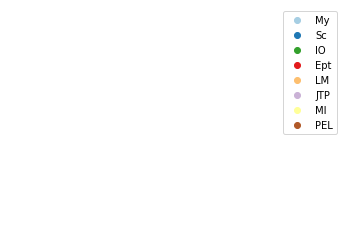

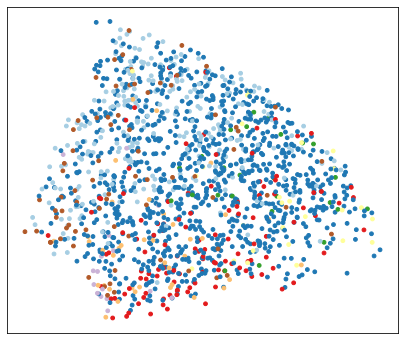

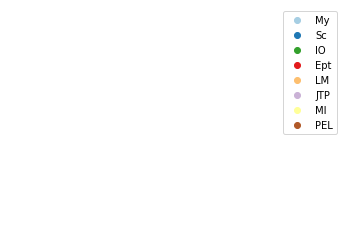

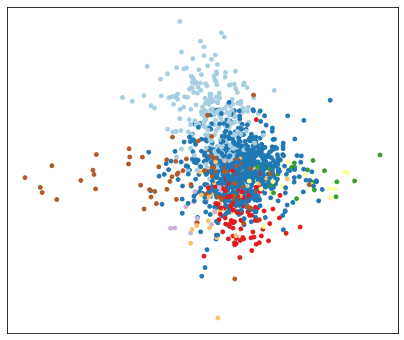

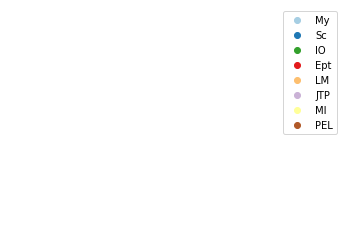

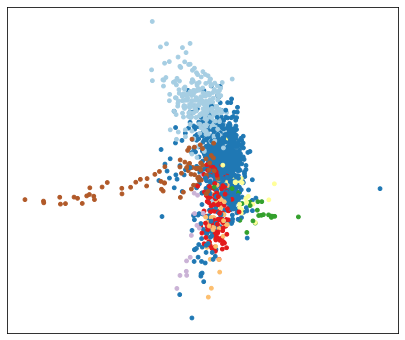

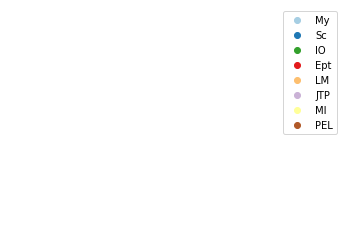

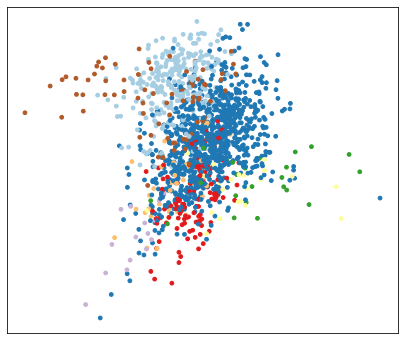

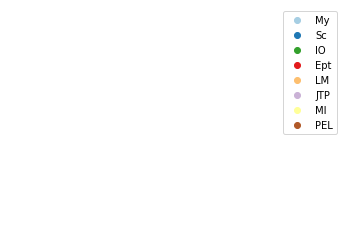

In [13]:
Visualize(i = 0,
          prefix = 'MouseEmbryo_SSV2/SI_Benchmarking/',
          out_prefix = 'Benchmarking/Embryo1/',
          test_indices = test_indices, s = 14,
          adata = adata, Y = Y)

# Drosophila Embryo

In [14]:
ST = pd.read_csv('DroEmbryo/bdtnp.txt', sep = '\t')
loc = pd.read_csv('DroEmbryo/geometry.txt', sep = ' ')

loc_Norm = PP.MinMaxNorm(loc, Y_ref = loc)

adata = ad.AnnData(X=ST.values, var = pd.DataFrame(ST.columns).set_index(0))
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs[['x_coord', 'y_coord', 'z_coord']] = loc.values

Y= loc.values
YNorm = PP.MinMaxNorm(loc, Y_ref = loc).values

train_indices, test_indices = PP.LoadIndices(prefix = 'DroEmbryo/')
SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams = Preprocess2('DroEmbryo/SI_Benchmarking/', Y)

In [15]:
Tangram_performance = BM.eval_cv(Tangrams, YNorm, test_indices)
SpaOTsc_performance = BM.eval_cv(SpaOTscs, YNorm, test_indices)
novo_performance = BM.eval_cv(novosparcs, YNorm, test_indices)
SC2Spa_performance = BM.eval_cv(SC2Spas, YNorm, test_indices)
LR_performance = BM.eval_cv(LRs, YNorm, test_indices)

In [16]:
Benchmark = pd.DataFrame([SC2Spa_performance.mean().tolist(),
                          Tangram_performance.mean().tolist(),
                          novo_performance.mean().tolist(),
                          SpaOTsc_performance.mean().tolist(),
                          LR_performance.mean().tolist()],
                          columns=['pearsonr', 'RMSE', 'R2'],
                          index = ['SC2Spa', 'Tangram', 'Novosparc', 'SpaOTsc', 'LR'])
for column in Benchmark.columns:
    Benchmark[column] = Benchmark[column].apply('{:,.3f}'.format)

root = 'Benchmarking/DroEmbryo/'
if not os.path.exists(root):
    os.makedirs(root)
    
Benchmark.to_csv(root + 'Benchmark_DroEmbryo.csv', header = True, index = True)
BM3 = Benchmark
Benchmark

,pearsonr,RMSE,R2
SC2Spa,0.982,0.078,0.966
Tangram,0.976,0.095,0.951
Novosparc,0.980,0.081,0.964
SpaOTsc,0.938,0.235,0.699
LR,0.853,0.202,0.764


In [17]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

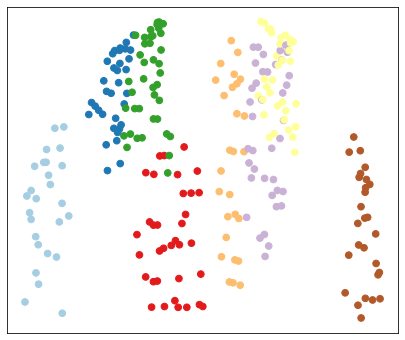

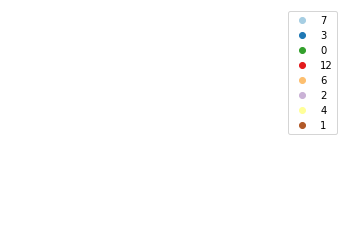

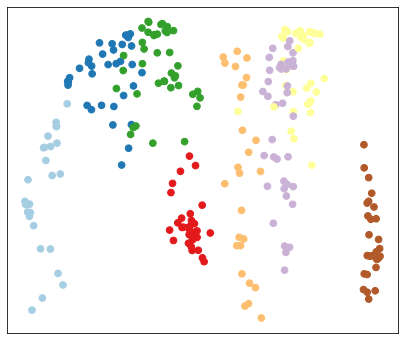

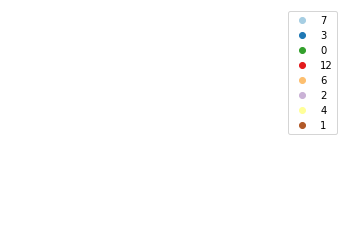

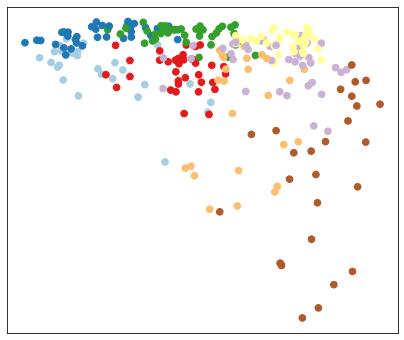

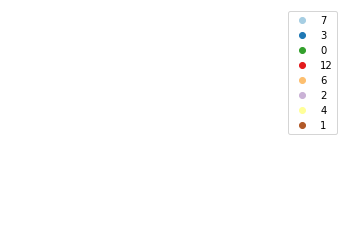

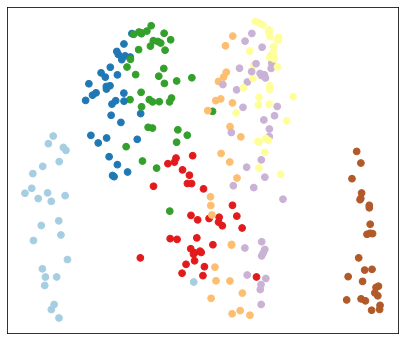

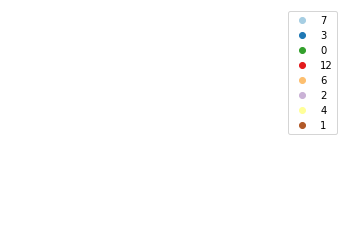

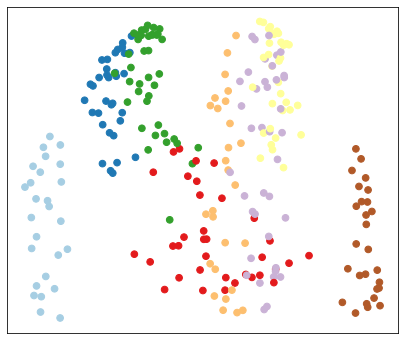

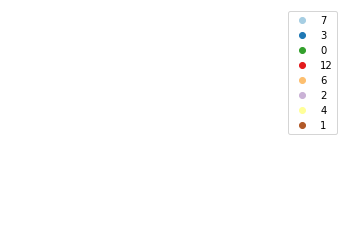

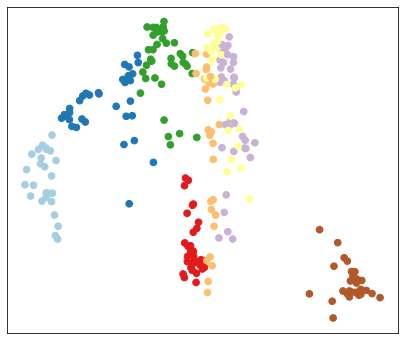

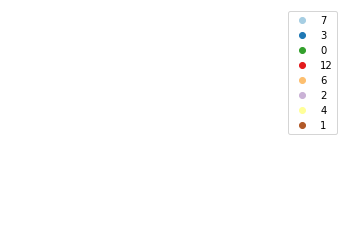

In [18]:
i = 0
dim = [0,1]

Visualize2(prefix = 'DroEmbryo/SI_Benchmarking/',
           out_prefix = 'Benchmarking/DroEmbryo/x_y_',
           index = test_indices[i], SC2Spa = SC2Spas[i][:,dim],
           LR = LRs[i][:,dim], Tangram = Tangrams[i][:,dim],
           novosparc = novosparcs[i][:,dim], SpaOTsc = SpaOTscs[i][:,dim],
           adata = adata, s = 44, ctname = 'leiden', Y = Y[:,dim])

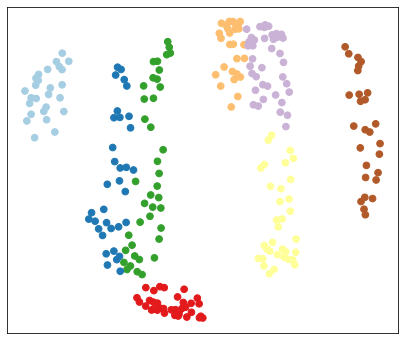

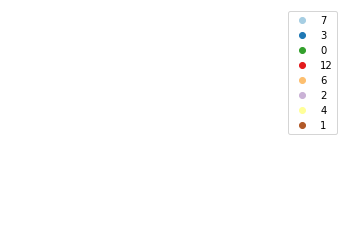

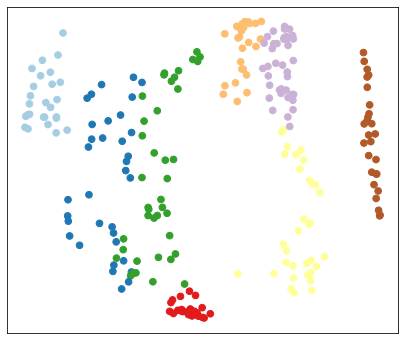

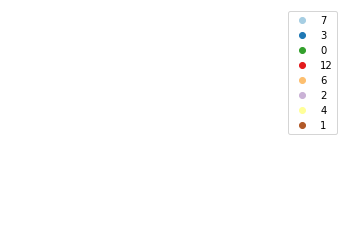

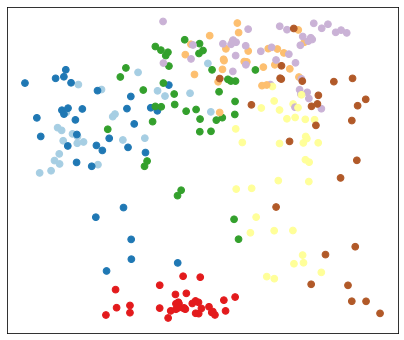

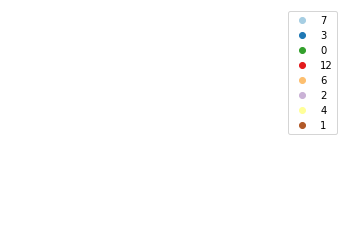

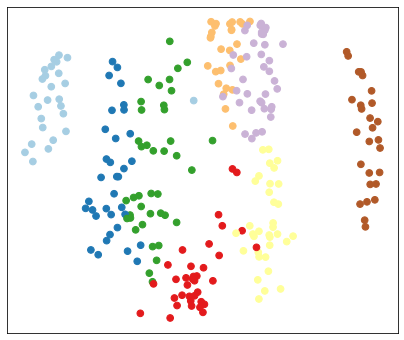

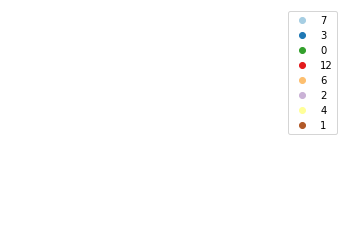

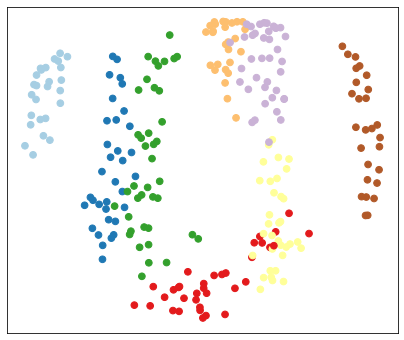

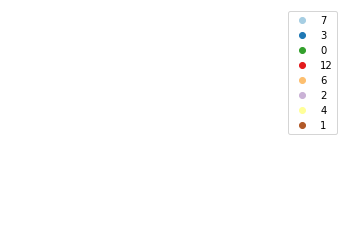

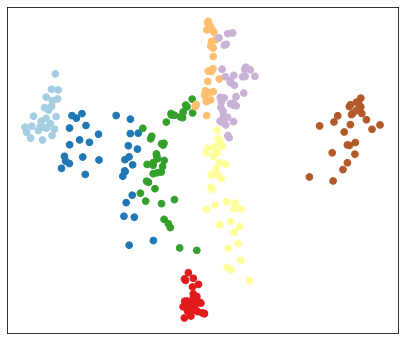

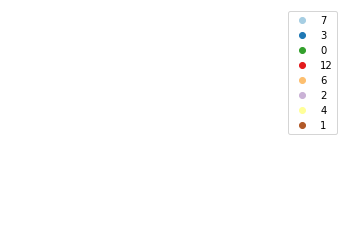

In [19]:
i = 0
dim = [0,2]

Visualize2(prefix = 'DroEmbryo/SI_Benchmarking/',
           out_prefix = 'Benchmarking/DroEmbryo/x_z_',
           index = test_indices[i], SC2Spa = SC2Spas[i][:,dim],
           LR = LRs[i][:,dim], Tangram = Tangrams[i][:,dim],
           novosparc = novosparcs[i][:,dim], SpaOTsc = SpaOTscs[i][:,dim],
           adata = adata, s = 44, ctname = 'leiden', Y = Y[:,dim])

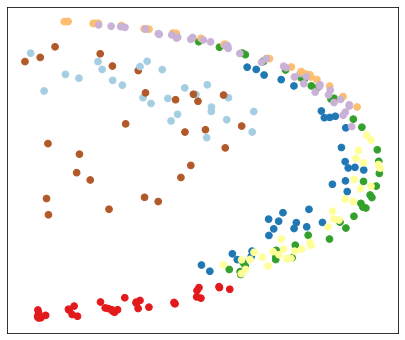

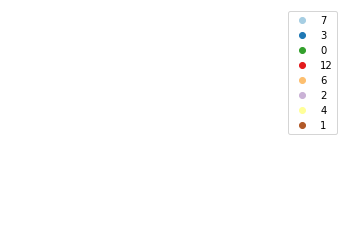

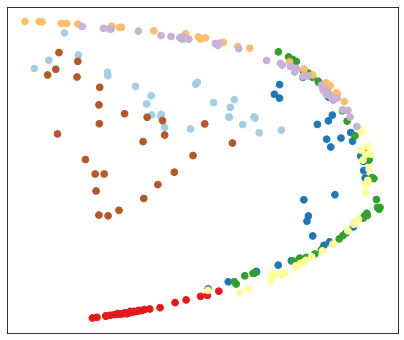

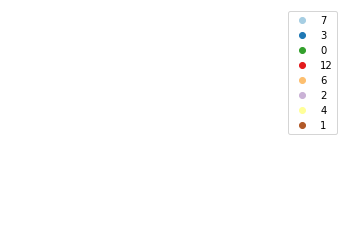

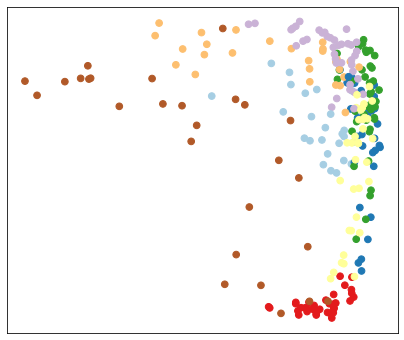

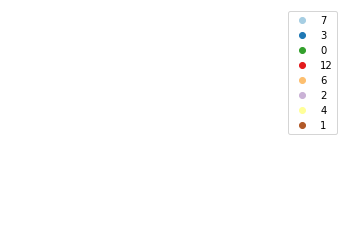

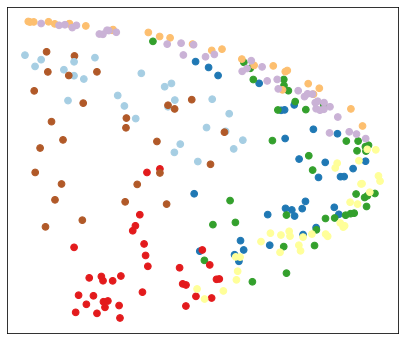

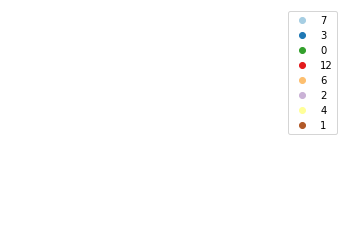

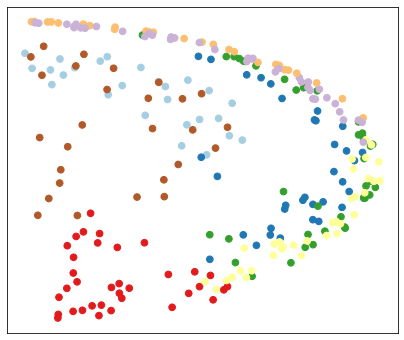

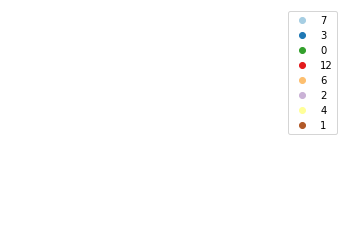

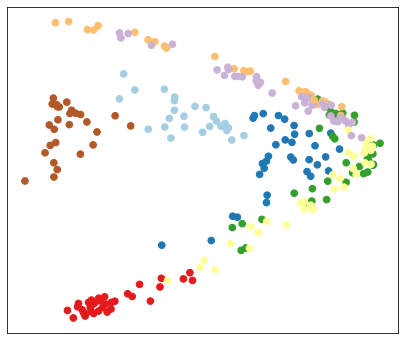

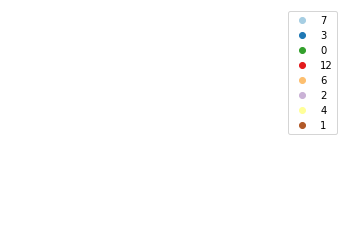

In [20]:
i = 0
dim = [1, 2]

Visualize2(prefix = 'DroEmbryo/SI_Benchmarking/',
           out_prefix = 'Benchmarking/DroEmbryo/y_z_',
           index = test_indices[i], SC2Spa = SC2Spas[i][:,dim],
           LR = LRs[i][:,dim], Tangram = Tangrams[i][:,dim],
           novosparc = novosparcs[i][:,dim], SpaOTsc = SpaOTscs[i][:,dim],
           adata = adata, s = 44, ctname = 'leiden', Y = Y[:,dim])

# Mouse Olfactory Bulb

In [25]:
ST = pd.read_csv('MOB_Visium/MOBRep12_Processed.csv')
loc = pd.read_csv('MOB_Visium/MOBRep12_loc.csv')[['x', 'y']]

loc_Norm = PP.MinMaxNorm(loc, Y_ref = loc)

adata = ad.AnnData(X=ST.values, var = pd.DataFrame(ST.columns).set_index(0))
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs[['x_coord', 'y_coord']] = loc.values

Y= loc.values
YNorm = PP.MinMaxNorm(loc, Y_ref = loc).values

train_indices, test_indices = PP.LoadIndices(prefix = 'MOB_Visium/')
SpaOTscs, novosparcs, SC2Spas, LRs, Tangrams = Preprocess2('MOB_Visium/SI_Benchmarking/', Y)

In [26]:
Tangram_performance = BM.eval_cv(Tangrams, YNorm, test_indices)
SpaOTsc_performance = BM.eval_cv(SpaOTscs, YNorm, test_indices)
novo_performance = BM.eval_cv(novosparcs, YNorm, test_indices)
SC2Spa_performance = BM.eval_cv(SC2Spas, YNorm, test_indices)
LR_performance = BM.eval_cv(LRs, YNorm, test_indices)

In [27]:
Benchmark = pd.DataFrame([SC2Spa_performance.mean().tolist(),
                          Tangram_performance.mean().tolist(),
                          novo_performance.mean().tolist(),
                          SpaOTsc_performance.mean().tolist(),
                          LR_performance.mean().tolist()],
                          columns=['pearsonr', 'RMSE', 'R2'],
                          index = ['SC2Spa', 'Tangram', 'Novosparc', 'SpaOTsc', 'LR'])
for column in Benchmark.columns:
    Benchmark[column] = Benchmark[column].apply('{:,.3f}'.format)

root = 'Benchmarking/MOB/'
if not os.path.exists(root):
    os.makedirs(root)
    
Benchmark.to_csv(root + 'Benchmark_MOB.csv', header = True, index = True)
BM4 = Benchmark
Benchmark

,pearsonr,RMSE,R2
SC2Spa,0.388,0.353,0.092
Tangram,0.191,0.368,0.017
Novosparc,0.312,0.357,0.079
SpaOTsc,0.061,0.374,-0.015
LR,0.124,0.468,-0.726


In [28]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

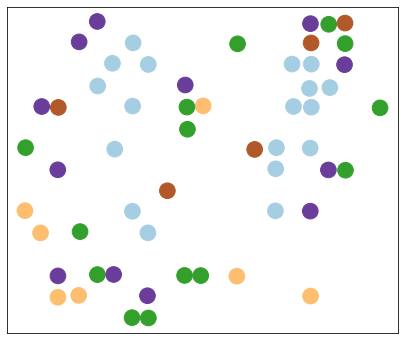

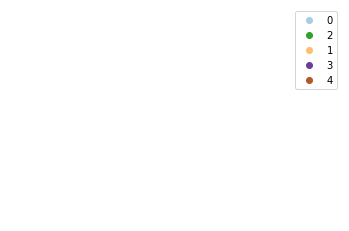

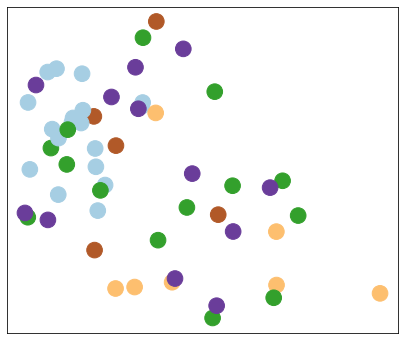

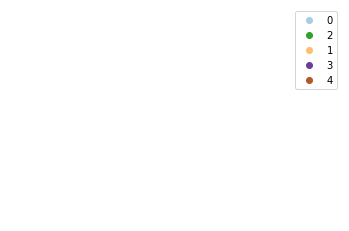

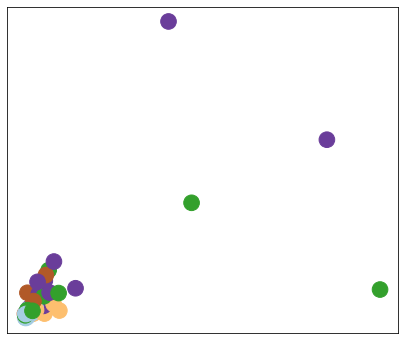

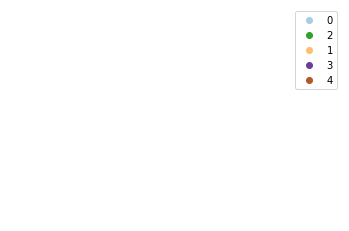

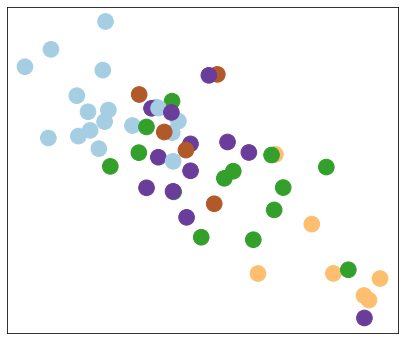

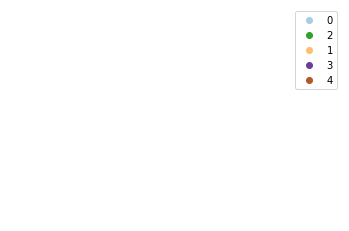

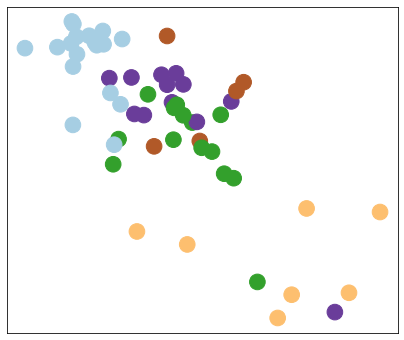

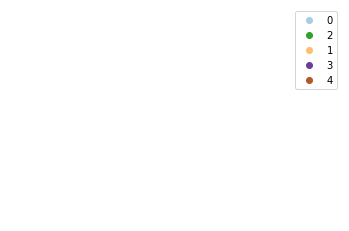

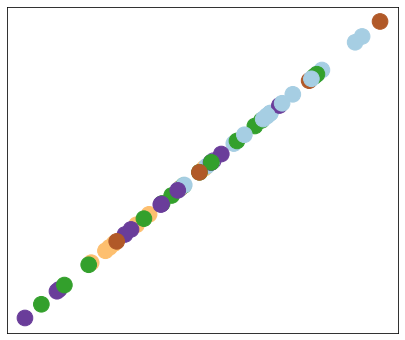

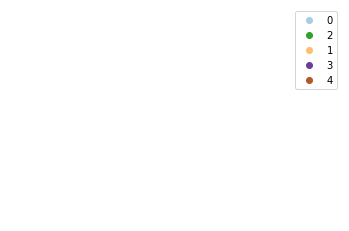

In [31]:
i = 0

Visualize2(prefix = 'MOB_Visium/SI_Benchmarking/',
           out_prefix = 'Benchmarking/MOB/',
           index = test_indices[i], SC2Spa = SC2Spas[i],
           LR = LRs[i], Tangram = Tangrams[i],
           novosparc = novosparcs[i], SpaOTsc = SpaOTscs[i],
           adata = adata, s = 244, ctname = 'leiden', Y = Y[:,[0,1]])

# Barplot

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def Barplot(BMs, fontsize = 12, legend = False,
	        colors = ['C3', 'C5', 'C4', 'C1', 'C0']):
    #Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    ind = np.arange(len(BMs))
    width = 0.15

    plt.rcParams['font.size'] = fontsize

    for column in BMs[0].columns:
        print(column)
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        for i in range(BMs[0].shape[0]):
            ax.bar(ind + width * i, [float(BM.iloc[i][column]) for BM in BMs],
                   fill = True, color = colors[i], width = width-0.04)

        plt.tick_params(axis='x',
                        which='both',
                        bottom=False,
                        labelbottom=False)
        if(legend):
            ax.legend(labels=BMs[0].index.tolist())
            plt.title(column, fontsize = 24)
        if(legend):
            plt.savefig('Benchmarking/'+column+'.png', bbox_inches = 'tight')
        else:
            plt.savefig('Benchmarking/'+column+'_no_legend.png', bbox_inches = 'tight')
        plt.show()

    ###################
    ####Draw legend####
    ###################
    palette = dict(zip(BM2.index.tolist(), colors))
    # Create legend handles manually
    handles = [mpl.patches.Patch(color=palette[x], label = x) for x in palette.keys()]
    # Create legend
    plt.legend(handles=handles)
    # Get current axes object and turn off axis
    plt.gca().set_axis_off()
    plt.savefig('Benchmarking/barplot_legend.png', bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


pearsonr


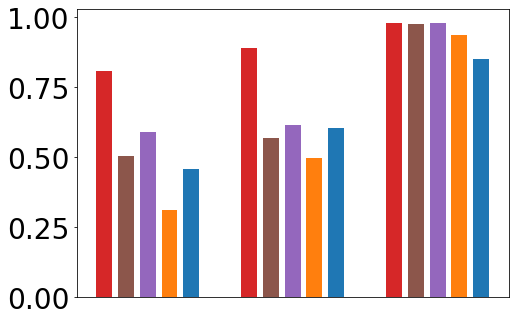

RMSE


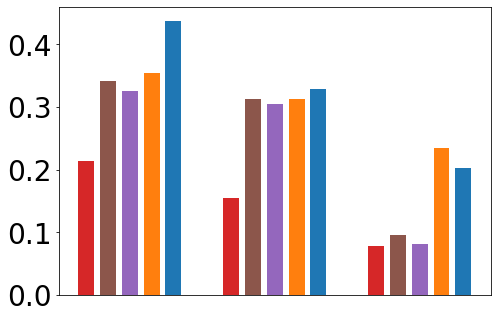

R2


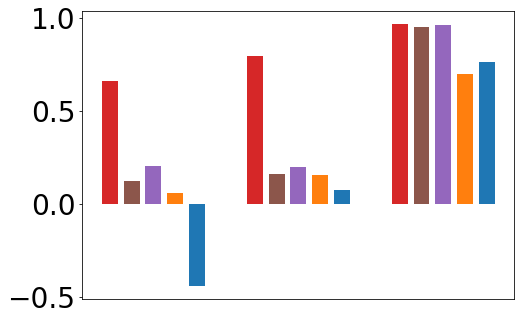

NameError: name 'BM2' is not defined

In [22]:
BM.Barplot([BM1, BM2, BM3], fontsize = 28, legend = False)
#Barplot([BM1, BM2, BM3, BM4], fontsize = 28, legend = False)

pearsonr_x


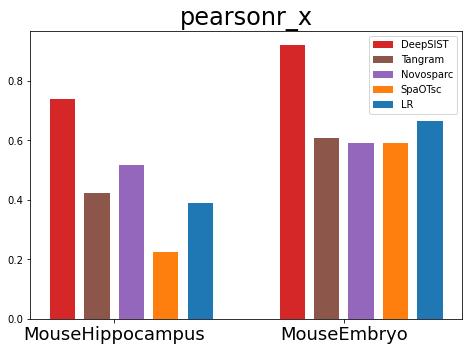

pearsonr_y


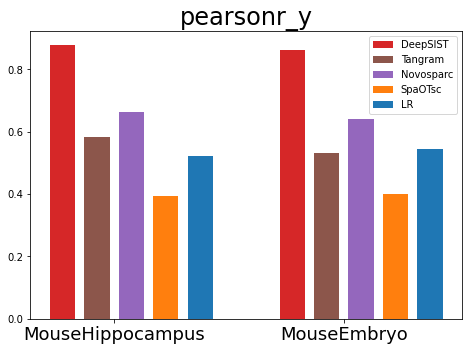

RMSE


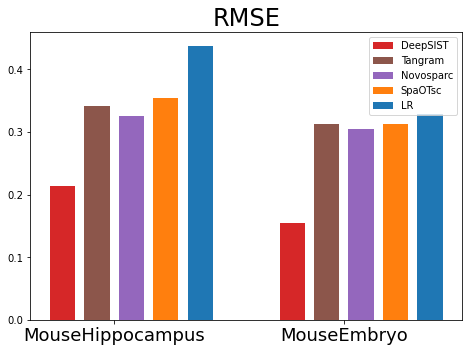

R2


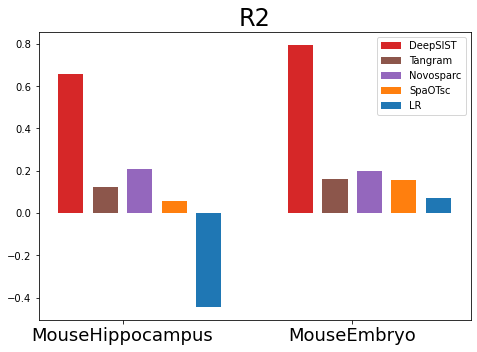

In [13]:
BM.Barplot(BM1, BM2, 'MouseHippocampus', 'MouseEmbryo')